<a href="https://colab.research.google.com/github/w12l3-c/Drug-Binding-Protein/blob/main/Protein_binding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conclusion
<strong>**LCBM with Class weights is the best**</strong>

<sup>Undersampling and oversampling doesn't do as well</sup>

# Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [ ]:
!pip install imbalanced-learn
import numpy as np
import seaborn as sb
import sklearn as sk
import matplotlib.pyplot as plt
import imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dataset 


In [ ]:
import pandas as pd

df_train = pd.read_csv("/content/drive/MyDrive/af2_dataset_training_labeled.csv.gz", index_col=0)
df_train

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
0,M,False,False,False,False,False,False,False,False,False,...,0,0.0,47,-0.0,-26.499001,-4.742000,-35.189999,GEMI5_HUMAN,0,False
1,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-25.158001,-1.342000,-34.104000,GEMI5_HUMAN,1,False
2,Q,False,False,False,False,False,False,False,False,False,...,1,-0.0,-1,-0.0,-21.926001,-1.641000,-32.175999,GEMI5_HUMAN,2,False
3,E,False,False,False,True,False,False,False,False,False,...,706,-0.1,705,-0.0,-22.073999,0.654000,-29.171000,GEMI5_HUMAN,3,False
4,P,False,False,False,False,False,False,False,False,False,...,0,0.0,705,-0.2,-19.783001,2.670000,-26.858999,GEMI5_HUMAN,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,S,False,False,False,False,False,False,False,False,False,...,-3,-0.1,2,-0.4,-19.742001,20.796000,-12.319000,AOC3_HUMAN,755,False
756,H,False,False,False,False,False,False,True,False,False,...,-358,-0.1,-330,-0.1,-16.299000,19.153999,-12.640000,AOC3_HUMAN,756,False
757,G,False,False,False,False,False,True,False,False,False,...,-360,-0.2,-1,-0.1,-13.404000,19.502001,-10.121000,AOC3_HUMAN,757,False
758,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-10.986000,20.320000,-13.016000,AOC3_HUMAN,758,False


In [ ]:
df_train.columns

Index(['annotation_sequence', 'feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F',
       'feat_G', 'feat_H', 'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N',
       'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W',
       'feat_Y', 'annotation_atomrec', 'feat_PHI', 'feat_PSI', 'feat_TAU',
       'feat_THETA', 'feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT', 'feat_DSSP_H',
       'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G', 'feat_DSSP_I',
       'feat_DSSP_T', 'feat_DSSP_S', 'feat_DSSP_6', 'feat_DSSP_7',
       'feat_DSSP_8', 'feat_DSSP_9', 'feat_DSSP_10', 'feat_DSSP_11',
       'feat_DSSP_12', 'feat_DSSP_13', 'coord_X', 'coord_Y', 'coord_Z',
       'entry', 'entry_index', 'y_Ligand'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497166 entries, 0 to 759
Data columns (total 50 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   annotation_sequence  497166 non-null  object 
 1   feat_A               497166 non-null  bool   
 2   feat_C               497166 non-null  bool   
 3   feat_D               497166 non-null  bool   
 4   feat_E               497166 non-null  bool   
 5   feat_F               497166 non-null  bool   
 6   feat_G               497166 non-null  bool   
 7   feat_H               497166 non-null  bool   
 8   feat_I               497166 non-null  bool   
 9   feat_K               497166 non-null  bool   
 10  feat_L               497166 non-null  bool   
 11  feat_M               497166 non-null  bool   
 12  feat_N               497166 non-null  bool   
 13  feat_P               497166 non-null  bool   
 14  feat_Q               497166 non-null  bool   
 15  feat_R              

All columns with the `feat_*` prefix are boolean, integer, or float features that describe the residue itself.  These can be used for training a model.  Domain knowledge of these values should not be necessary to participate in the challenge, but we've provided brief descriptions below for anyone who may be interested:

* `feat_[letter]` are one-hot encoded boolean values for each of the 20 possible amino acids.
* `feat_PHI`, `feat_PSI`, `feat_TAU`, `feat_THETA` describe various protein chain bonding angles, computed with [Biopython](https://biopython.org/docs/1.75/api/Bio.PDB.Polypeptide.html).
* `feat_BBSASA`, `feat_SCSASA` describe the solvent accessible surface area, calculated using [FreeSASA](https://freesasa.github.io/).
* `feat_pLDDT` is an AlphaFold2 residue-level prediction confidence value.
* `feat_DSSP_[letter]` are secondary structure assignments by [DSSP].(https://en.wikipedia.org/wiki/DSSP_(algorithm))
* `feat_DSSP_[number]` are other backbone structural features describing backbone hydrogen. bonding networks, also assigned by [DSSP](https://en.wikipedia.org/wiki/DSSP_(algorithm)).

Column `y_Ligand` indicates if the residue (row) belongs to a known binding site or not.  This column is the classification objective for our challenge. 

The remaining columns describe other elements of the protein structure for reference or troubleshooting purposes.  Participants may use this information to to engineer new features/representations in their models if they so choose. These include:
* `annotation_sequence` and `annotation_atomrec`: Residue amino acid in character format.
* `entry`: Protein name, can be looked up on Uniprot for more information about the protein.  Each unique entry is one unique protein structure in this dataset.
* `coord_X`, `coord_Y`, `coord_Z`: XYZ coordinates of the residue in the respective protein structure.  For example, all residues for protein 'QCR1_HUMAN' belong to the same coordinate space, but the coordinate space would shared between two residues (rows) with `entry` values of 'QCR1_HUMAN' and 'PPM1A_HUMAN'.
* `entry_index`: The order of the amino acid within the protein sequence.  As with coordinates, these relationships are only meaningful for rows (residues) that share the same `entry` value.  For example, within QCR1_HUMAN two residues (rows) with `entry_index` 5 and 6 are adjacent (connected) neighbors.

The test dataset has the same format, but is otherwise missing the `y_Ligand` column. 

In [ ]:
bool_train_labels = np.array(df_train[['y_Ligand']]) != 0
pos_df = pd.DataFrame(df_train[ bool_train_labels], columns=df_train.columns)

In [ ]:
pos_df.columns

Index(['annotation_sequence', 'feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F',
       'feat_G', 'feat_H', 'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N',
       'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W',
       'feat_Y', 'annotation_atomrec', 'feat_PHI', 'feat_PSI', 'feat_TAU',
       'feat_THETA', 'feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT', 'feat_DSSP_H',
       'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G', 'feat_DSSP_I',
       'feat_DSSP_T', 'feat_DSSP_S', 'feat_DSSP_6', 'feat_DSSP_7',
       'feat_DSSP_8', 'feat_DSSP_9', 'feat_DSSP_10', 'feat_DSSP_11',
       'feat_DSSP_12', 'feat_DSSP_13', 'coord_X', 'coord_Y', 'coord_Z',
       'entry', 'entry_index', 'y_Ligand'],
      dtype='object')

In [ ]:
important = ['feat_THETA', 'entry_index', 'coord_X', 'coord_Y', 'coord_Z', 'feat_DSSP_6, 8, 10, 12', 'feat_pLDDT']

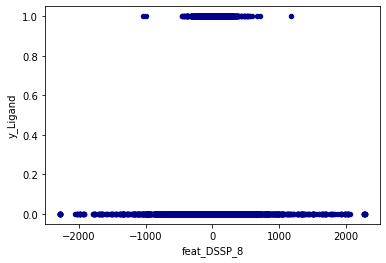

In [ ]:
plot = df_train.plot.scatter(x='feat_DSSP_8', y='y_Ligand', c='DarkBlue')

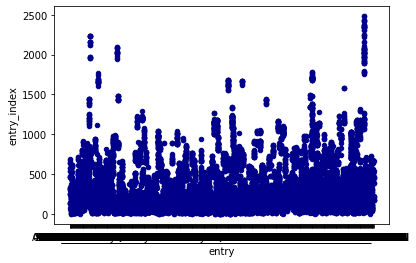

In [ ]:
plot = pos_df.plot.scatter(x='entry', y='entry_index', c='DarkBlue')

In [ ]:
entry_count = pos_df["entry"].value_counts()
print(entry_count)

PTN1_HUMAN     155
KDM4D_HUMAN    148
ACLY_HUMAN     104
CDK2_HUMAN      92
IMDH2_HUMAN     91
              ... 
CISD1_HUMAN      3
KLK3_HUMAN       3
PHF2_HUMAN       2
ANXA3_HUMAN      2
IGHG2_HUMAN      2
Name: entry, Length: 635, dtype: int64


In [ ]:
entry_count = pos_df["entry"].value_counts()
entry_rank = list(entry_count.index)
entry_org = list(df_train['entry'].unique())
for i in entry_org:
  if i not in entry_rank:
    entry_rank.append(i)
entry_rank = entry_rank[::-1]

In [ ]:
zeros = (df_train['y_Ligand'] == 0).sum()
ones = (df_train['y_Ligand'] == 1).sum()

print(f"Number of Negative Case: {zeros}")
print(f"Number of Positive Case: {ones}")

neg, pos = np.bincount(df_train['y_Ligand'])
print(f"The number of pos to neg is {round(pos/neg, 4)}")
scale_pos = neg/pos
print(f"Sclae Weight is {round(scale_pos, 4)}")

pos_percent = pos/(pos+neg)
print(f"The Postive Percentage in the Dataset is {round(pos_percent*100, 2)}%")

Number of Negative Case: 479912
Number of Positive Case: 17254
The number of pos to neg is 0.036
Sclae Weight is 27.8145
The Postive Percentage in the Dataset is 3.47%


In [ ]:
# Set Class Weights
total = neg + pos
epsilon = 2.0
weight_for_0 = (1 / neg) * (total / epsilon)
weight_for_1 = (1 / pos) * (total / epsilon)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print(f"Factor of {weight_for_1/weight_for_0}")

Weight for class 0: 0.52
Weight for class 1: 14.41
Factor of 27.814535759823812


In [ ]:
# Very Imbalance Dataset, that's why the ROC is very bad 50-50

In [ ]:
# turn all true and false into 1 and 0
for col in df_train.columns:
  if df_train[col].dtype == 'bool':
    df_train[col] = df_train[col].apply(lambda x: 1 if x == True else 0)

In [ ]:
entry_categories = df_train.entry.unique()
print(f"Unique values in entry: {len(df_train.entry.unique())}")
print(df_train.entry.unique())

In [ ]:
# annotation_sequence and annotation_atomrec are the same and they are represented by the one-hot, so just ignored these two rows

In [ ]:
df_train_entry = df_train[['entry']]
df_train.drop(axis = 1, columns=['entry'])

In [ ]:
# Reshape entry because one-hot encoding accept (-1, 1) for one column one-hot
df_train_entry = df_train_entry.values
df_train_entry = df_train_entry.reshape((-1, 1))

In [ ]:
# Need to one-hot the entry
from sklearn.preprocessing import OneHotEncoder
# 1. INSTANTIATE
enc = OneHotEncoder()

# 2. FIT
enc.fit(df_train_entry)

OneHotEncoder()

In [ ]:
enc.categories_ # basically the unique values print above

In [ ]:
# 3. Transform
onehotlabels = enc.transform(df_train_entry).toarray()
onehotlabels.shape

(497166, 723)

In [ ]:
onehotlabels[:5, :]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Combine the onehoted entry and original together
df_train_entry = pd.DataFrame(onehotlabels, columns=entry_categories)
df_train_entry.reset_index(inplace=True, drop=True)
df_train.reset_index(inplace=True, drop=True)
df_train = pd.concat([df_train, df_train_entry], axis=1)

In [ ]:
df_train.shape

(497166, 48)

In [ ]:
# One-hot Encoding Crash the Session so I will use Labelled encoding
from sklearn.preprocessing import LabelEncoder, Normalizer
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df_train_entry = pd.DataFrame(entry_rank, index=None)
le.fit(df_train_entry)
df_train['entry'] = le.transform(df_train['entry'])

# 4. NORMALIZE
# Update maybe not, the normalize value are bad, ill use log
# transformer = Normalizer().fit(df_train_entry)
# df_train_entry = transformer.transform(df_train_entry)

# 5. JOIN
# df_train_entry = pd.DataFrame(df_train_entry, columns=['entry'])
# df_train_entry.reset_index(inplace=True, drop=True)
# df_train.reset_index(inplace=True, drop=True)
# df_train = pd.concat([df_train, df_train_entry], axis=1)

In [ ]:
df_train = df_train.drop(columns=['annotation_sequence', 'annotation_atomrec'], axis=1)

In [ ]:
df_train['entry']

0      253
1      253
2      253
3      253
4      253
      ... 
755     52
756     52
757     52
758     52
759     52
Name: entry, Length: 497166, dtype: int64

In [ ]:
testing = df_train.copy()

In [ ]:
testing.iloc[:, 20:27].describe()

,feat_PHI,feat_PSI,feat_TAU,feat_THETA,feat_BBSASA,feat_SCSASA,feat_pLDDT
count,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000
mean,-1.162007,0.780075,-0.108342,1.854782,16.746550,1.289043,75.733749
std,1.039634,1.520499,1.833996,0.469940,18.494097,1.859579,26.971019
min,-3.141557,-3.141564,-3.141578,0.000000,0.000000,-16.255620,0.000000
25%,-1.686451,-0.654101,-2.067246,1.590771,1.239801,0.772849,55.360000
50%,-1.199133,0.241335,0.775206,1.756220,8.788650,1.649848,89.530000
75%,-1.047934,2.297116,0.966645,2.122055,29.958422,1.941390,95.960000
max,3.141575,3.141584,3.141568,3.137176,99.338342,16.556650,98.980000


In [ ]:
testing.iloc[:, 27:42].describe()

,feat_DSSP_H,feat_DSSP_B,feat_DSSP_E,feat_DSSP_G,feat_DSSP_I,feat_DSSP_T,feat_DSSP_S,feat_DSSP_6,feat_DSSP_7,feat_DSSP_8,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13
count,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000
mean,0.308249,0.007446,0.138016,0.030473,0.004212,0.092802,0.065608,-0.272655,-1.160675,0.263568,-1.140480,-0.052115,-0.177757,0.048162,-0.201625
std,0.461771,0.085970,0.344917,0.171884,0.064762,0.290155,0.247596,0.721538,1.058466,0.737157,1.062049,0.653185,0.156652,0.704193,0.232904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.358125,-4.000000,-3.358125,-4.000000,-3.357935,-1.800000,-3.358125,-2.900000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.602060,-2.200000,0.000000,-2.200000,-0.301030,-0.200000,-0.301030,-0.200000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.301030,-0.700000,0.301030,-0.600000,0.000000,-0.200000,-0.000000,-0.200000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.602060,-0.200000,0.301030,-0.100000,0.301030,-0.100000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.358125,0.000000,3.358125,-0.000000,3.358125,0.000000,3.358316,-0.000000


In [ ]:
testing.iloc[:, 42:].describe()

,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
count,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000
mean,-3.927826,1.956133,-1.099622,368.714192,535.495128,0.034705
std,25.770530,20.641283,26.637590,205.691048,665.740408,0.183031
min,-149.393997,-114.931000,-152.839005,0.000000,0.000000,0.000000
25%,-18.850000,-9.518750,-16.964001,195.000000,172.000000,0.000000
50%,-2.881000,1.206000,-0.681000,374.000000,365.000000,0.000000
75%,11.469000,13.148000,14.147000,531.000000,667.000000,0.000000
max,162.250000,103.135002,176.059998,722.000000,7384.000000,1.000000


In [ ]:
testing.info()

In [ ]:
# Normalize
# 'feat_PHI',	'feat_PSI',	'feat_TAU',
# 'coord_X', 'coord_Y',	'coord_Z',
# 'feat_DSSP_6', 'feat_DSSP_7', 'feat_DSSP_8', 'feat_DSSP_9', 'feat_DSSP_10', 'feat_DSSP_11', 'feat_DSSP_12', 'feat_DSSP_13',
norm_col = ['feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT']
log_col = ['feat_SCSASA', 'feat_DSSP_6', 'feat_DSSP_8', 'feat_DSSP_10', 'feat_DSSP_12', 'entry_index', 'entry']
pos_col = ['feat_DSSP_7', 'feat_DSSP_9', 'feat_DSSP_11', 'feat_DSSP_13']
range = ['0-100', '-1-220', '0-100', '-2281-2281', '-4-0', '-2281-2281', '-4-0', '-2281-2281', '-4-0', '-2281-2281', '-4-0', '-149-162', '-114-103', '-152-176', '0-7384', '0, 722']

In [ ]:
for col in pos_col:
  testing[col] = testing[col].apply(lambda x:-x)

In [ ]:
def log(value):
  if value > 0:
    return np.log10(value)
  elif value < 0:
    value *= -1
    return -np.log10(value)
  else:
    return 0

In [ ]:
for col in log_col:
  testing[col] = testing[col].apply(lambda x:log(x))

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

# MinMaxScaler is better
transform_arr = []
for col in norm_col:
  temp = testing[col].values
  temp = temp.reshape((-1, 1))
  transformer = MinMaxScaler().fit(temp)
  transform_arr.append(transformer)
  testing[col] = transformer.transform(temp)
  testing[col] = testing[col].apply(lambda x:2*x)
  transformer = None

In [ ]:
print(transform_arr)

[MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()]


In [ ]:
df_train = testing

# Test Train Val

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(["y_Ligand"], axis=1), df_train["y_Ligand"], test_size=0.2, random_state=42)

In [ ]:
without_categorical_columns = [col for col in X_train.columns if X_train[col].dtype != "O"]

In [ ]:
print(without_categorical_columns)

['feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F', 'feat_G', 'feat_H', 'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N', 'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W', 'feat_Y', 'feat_PHI', 'feat_PSI', 'feat_TAU', 'feat_THETA', 'feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT', 'feat_DSSP_H', 'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G', 'feat_DSSP_I', 'feat_DSSP_T', 'feat_DSSP_S', 'feat_DSSP_6', 'feat_DSSP_7', 'feat_DSSP_8', 'feat_DSSP_9', 'feat_DSSP_10', 'feat_DSSP_11', 'feat_DSSP_12', 'feat_DSSP_13', 'coord_X', 'coord_Y', 'coord_Z', 'entry_index', 'entry']


In [ ]:
# My Ram is exploding :(
df_train = None
df_train_entry = None
onehotlabels = None

# OverSampling

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from collections import Counter
from numpy.random import RandomState
from imblearn.over_sampling import SMOTE, KMeansSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

sm = SMOTE(random_state=49)
ksm = KMeansSMOTE(kmeans_estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=40)
smt = SMOTETomek()
sme = SMOTEENN()

In [ ]:
print('Original dataset shape %s' % Counter(y_train))
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({0: 383874, 1: 13858})
Resampled dataset shape Counter({0: 383874, 1: 383874})


# UnderSampling

In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=1, n_neighbors=3)

In [ ]:
print('Original dataset shape %s' % Counter(y_train))
X_train_res, y_train_res = nm.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({0: 383874, 1: 13858})
Resampled dataset shape Counter({0: 13858, 1: 13858})


In [ ]:
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection()

In [ ]:
print('Original dataset shape %s' % Counter(y_train))
X_train_res, y_train_res = oss.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_res))

In [ ]:
X_train, y_train = X_train_res, y_train_res

In [ ]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

renn = RepeatedEditedNearestNeighbours()

In [ ]:
print('Original dataset shape %s' % Counter(y_train))
X_train_res, y_train_res = renn.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_res))

# LazyPredict
UPDATE: I can't do this cuz I am poor and I don't have gpu, colab stopped me when ram exploded :(


In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Classification
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 38%|███▊      | 11/29 [34:46<1:36:42, 322.37s/it]

In [ ]:
# Regression
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 24%|██▍       | 10/42 [04:37<16:25, 30.79s/it]

# XGBoost


In [ ]:
import xgboost 
xgb = xgboost.XGBClassifier(scale_pos_weight=(1), reg_lambda=1.1)

In [ ]:
xgb.fit(X_train[without_categorical_columns], y_train)

XGBClassifier(reg_lambda=1.1)

In [ ]:
y_test_pred = xgb.predict(X_test[without_categorical_columns])

In [ ]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

# LGBM
This is the best, fast fit and better ROC, F1, PR

In [ ]:
clf = None
dw = 0.2
class_weight = {0: weight_for_0, 1: weight_for_1*dw}
print(class_weight[0])
print(class_weight[1])

0.5179762123055893
2.881453575982381


In [ ]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(class_weight=class_weight) 

In [ ]:
clf.fit(X_train[without_categorical_columns], y_train)

LGBMClassifier(class_weight={0: 0.5179762123055893, 1: 2.881453575982381})

In [ ]:
y_test_pred2 = clf.predict(X_test[without_categorical_columns])

In [ ]:
y_test_pred2

array([0, 0, 0, ..., 0, 0, 0])

# Support Vector Machine
RAM exploded Don't Use

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [ ]:
svc.fit(X_train[without_categorical_columns], y_train)

In [ ]:
y_test_pred3 = svc.predict(X_test[without_categorical_columns])

In [ ]:
y_test_pred3

# Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test_pred, y_test)
print(f"XGBoost:\nAccuracy: {accuracy}")

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
auc_roc = metrics.auc(fpr, tpr)

precision, recall, _ = metrics.precision_recall_curve(y_test, y_test_pred)
auc_pr = metrics.auc(recall, precision)

print(f"ROC-AUC: {auc_roc} \nPR-AUC {auc_pr}\n\n")

accuracy=accuracy_score(y_test_pred2, y_test)
print(f"LGBM:\nAccuracy: {accuracy}")

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred2, pos_label=1)
auc_roc = metrics.auc(fpr, tpr)

precision, recall, _ = metrics.precision_recall_curve(y_test, y_test_pred2)
auc_pr = metrics.auc(recall, precision)

print(f"ROC-AUC: {auc_roc} \nPR-AUC {auc_pr}\n\n")

# accuracy=accuracy_score(y_test_pred3, y_test)
# print(f"LGBM:\nAccuracy: {accuracy}")

# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred3, pos_label=1)
# auc_roc = metrics.auc(fpr, tpr)

# precision, recall, _ = metrics.precision_recall_curve(y_test, y_test_pred3)
# auc_pr = metrics.auc(recall, precision)

# print(f"ROC-AUC: {auc_roc} \nPR-AUC {auc_pr}")

XGBoost:
Accuracy: 0.9658466922782951
ROC-AUC: 0.5 
PR-AUC 0.5170766538608524


LGBM:
Accuracy: 0.9544823702154193
ROC-AUC: 0.6744896338269714 
PR-AUC 0.37069971930569




In [ ]:
# Honestly, the ROC is unimportant in Imbalanced Datset
# F1 Score is more Important

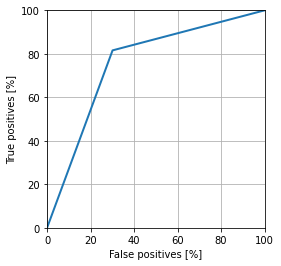

In [ ]:
plot_roc('ROC curve', y_test, y_test_pred)

In [ ]:
plot_roc('ROC curve', y_test, y_test_pred2)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# XGB
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.grid(False)
plt.show()

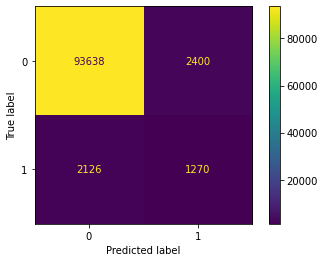

In [ ]:
# LCBM
cm = confusion_matrix(y_test, y_test_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.grid(False)
plt.show()

In [ ]:
# F1 Score for both
from sklearn.metrics import f1_score

XGB_F1 = f1_score(y_test, y_test_pred)
LCBM_F1 = f1_score(y_test, y_test_pred2)

print(f"The F1 Score for XGB is {XGB_F1}")
print(f"The F1 Score for LCBM is {LCBM_F1}")

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred2))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     96038
           1       0.00      0.00      0.00      3396

    accuracy                           0.97     99434
   macro avg       0.48      0.50      0.49     99434
weighted avg       0.93      0.97      0.95     99434

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     96038
           1       0.35      0.37      0.36      3396

    accuracy                           0.95     99434
   macro avg       0.66      0.67      0.67     99434
weighted avg       0.96      0.95      0.96     99434



In [ ]:
# In terms of F1 Score, dw = 0.2 is the best with 0.98 and 0.36 weighted of 0.96
# In terms of Better Result, as identifying as much positive dw = 0.5

## Submission Instructions

- Run inference on the test set and save the inference results as a csv file, the file should look like this
```
id,Predicted
0,True
1,False
2,True
3,False
....
```
- Submit the csv on Kaggle
- Automatic evaluation will be done with ROC-AUC
- Top submissions will be further evaluated by the mean of ROC-AUC and PR-AUC

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/af2_dataset_testset_unlabeled.csv.gz", index_col=0)
df_test

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index
0,M,False,False,False,False,False,False,False,False,False,...,0.0,0,0.0,0,0.0,33.116001,37.023998,38.417000,QCR1_HUMAN,0
1,A,True,False,False,False,False,False,False,False,False,...,-0.0,2,-0.0,0,0.0,35.849998,34.841000,40.185001,QCR1_HUMAN,1
2,A,True,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,2,-0.0,37.087002,31.719999,40.547001,QCR1_HUMAN,2
3,S,False,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,-2,-0.0,38.095001,28.951000,42.321999,QCR1_HUMAN,3
4,V,False,False,False,False,False,False,False,False,False,...,0.0,0,0.0,0,0.0,41.435001,27.417000,43.703999,QCR1_HUMAN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,L,False,False,False,False,False,False,False,False,False,...,-0.5,-3,-0.3,-3,-0.0,47.813999,7.569000,-27.368999,PDE7A_HUMAN,474
475,P,False,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,-3,-0.0,50.228001,8.068000,-30.333000,PDE7A_HUMAN,475
476,Q,False,False,False,False,False,False,False,False,False,...,-0.0,0,0.0,0,0.0,51.507999,4.896000,-31.959999,PDE7A_HUMAN,476
477,E,False,False,False,True,False,False,False,False,False,...,0.0,0,0.0,0,0.0,54.845001,6.372000,-33.125000,PDE7A_HUMAN,477


In [ ]:
y_test_submission = clf.predict(df_test[without_categorical_columns])

In [ ]:
s = pd.Series(y_test_submission).astype(bool)
s.name = "Predicted"
s.to_csv("submission.csv")

In [ ]:
s.head()

0    False
1    False
2    False
3    False
4    False
Name: Predicted, dtype: bool

In [ ]:
zeros_pred = (s.iloc[:] == False).sum()
ones_pred = (s.iloc[:] == True).sum()

print(f"Number of Negative Case: {zeros_pred}")
print(f"Number of Positive Case: {ones_pred}")

rate_of_pos = ones_pred/(zeros_pred+ones_pred)
print(rate_of_pos)  # close to the labelled dataset as it is 

Number of Negative Case: 107390
Number of Positive Case: 234
0.002174236229837211
